#                                               FINAL PROJECT  DATA 601 - Srikanth ALokam 

## Hypothesis: Reasons for fluctuations in amount of crop prduction for each year in each state of India ?

## Source for datasets: Government websites of India

### DATA SET 1 (Crops Cultivated in India):  https://data.gov.in/catalog/district-wise-season-wise-crop-production-statistics?filters%5Bfield_catalog_reference%5D=87631&format=json&offset=0&limit=6&sort%5Bcreated%5D=desc


### Data SET 2(Rainfall throughout India): https://data.gov.in/catalog/district-rainfall-normal-mm-monthly-seasonal-and-annual-data-period-1951-2000?filters%5Bfield_catalog_reference%5D=87155&format=json&offset=0&limit=6&sort%5Bcreated%5D=desc

### Units for crop production - Lakhs kg (1 Lakh= 0.1 million)
### Units for Area of land cultivated - Hectare
### Units for rain fall -millimeters per hour


#### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import OrderedDict

### Reading crops cultivation data

In [2]:
df_crop=pd.read_csv('Crops_cultivated_India.csv')
df_crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


### Reading second data set which is rain-fall throughout india

In [3]:
df_rain=pd.read_excel("Rainfall_Data_India.xls",usecols=["SD_Name","YEAR","ANNUAL"])
df_rain.head()

,SD_Name,YEAR,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,1951,3275.1
1,ARUNACHAL PRADESH,1951,3354.3
2,ASSAM & MEGHALAYA,1951,2956.7
3,"NAGALAND, MANIPUR, MIZORAM,TRIPURA",1951,2609.4
4,SUB-HIMALAYAN W BENGAL & SIKKIM,1951,2683.2


In [4]:
df_crop=df_crop[df_crop["Crop_Year"]>1999]

In [5]:
df_crop=df_crop[df_crop["Crop_Year"]<2015]

# Converting state names to upper case since state names in the other data set in upper case 

In [6]:
df_crop['State_Name'] = np.where(df_crop['State_Name'].apply(lambda x: isinstance(x, str)),
                       df_crop['State_Name'].str.upper(),
                       df_crop['State_Name'])
df_crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


# Data available for crops cultivation is from 2000 so excluding the rain-fall data before year 2000

In [7]:
df_rain=df_rain[df_rain["YEAR"]>1999]
df_rain.head()

,SD_Name,YEAR,ANNUAL
1761,ANDAMAN & NICOBAR ISLANDS,2000,2763.1
1762,ARUNACHAL PRADESH,2000,2157.6
1763,ASSAM & MEGHALAYA,2000,2729.3
1764,"NAGALAND, MANIPUR, MIZORAM,TRIPURA",2000,2366.9
1765,SUB-HIMALAYAN W BENGAL & SIKKIM,2000,2737.0


## CROPS are cultivated based on agricultural seasons in India

### There are 4 major agricultural seasons 

## They are : Kharif ,Autumn , Rabi , Summer , Winter

In [8]:
df_crop.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

## Eliminating unwanted space 

In [9]:
df_crop["Season"]=df_crop["Season"].str.strip()

In [10]:
df_crop.Season.unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

## production of all the crop according to Season

In [11]:
crops_sum=0
crops_dict={}
for season in df_crop["Season"].unique():
    crops_sum=df_crop[df_crop["Season"]==season].Production.sum()
    crops_dict[season]=crops_sum
crops_dict

{'Kharif': 3619764811.1,
 'Whole Year': 122139416987.28998,
 'Autumn': 56085944.019999996,
 'Rabi': 1735675536.0800002,
 'Summer': 144592884.73000002,
 'Winter': 362426007.96999997}

## Poping out element "Whole year" since it sum of all the seasons data

In [12]:
crops_dict.pop("Whole Year")

122139416987.28998

## Plot showing the amount of production of all the crops according to seasons from 2000-2015

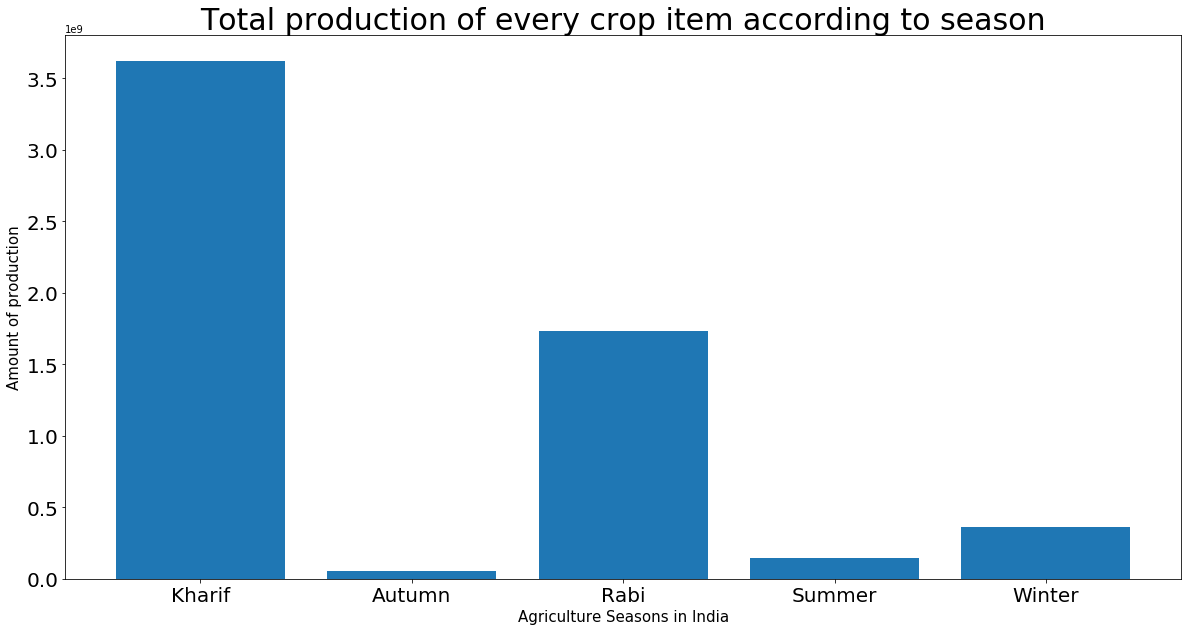

In [13]:
plt.figure(figsize=(20,10))
plt.bar(range(len(crops_dict)), list(crops_dict.values()), align='center')
plt.title("Total production of every crop item according to season",fontsize=30)
plt.xlabel("Agriculture Seasons in India",fontsize=15)
plt.ylabel("Amount of production",fontsize=15)
plt.xticks(range(len(crops_dict)), list(crops_dict.keys()),fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### List of all the crops that are cultivated in India

In [14]:
df_crop.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Gram',
       'Horse-gram', 'Jowar', 'Korra', 'Onion', 'other misc. pulses',
       'Ragi', 'Samai', 'Sesamum', 'Small millets', 'Linseed',
       'Safflower', 'Wheat', 'Coriander', 'Potato', 'Tobacco',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Varagu', 'Ga

### Dataframes created on tha basis of seasons

In [15]:
df_kharif=df_crop[df_crop["Season"]=='Kharif']
df_autumn=df_crop[df_crop["Season"]=='Autumn']
df_rabi=df_crop[df_crop["Season"]=='Rabi']
df_winter=df_crop[df_crop["Season"]=='Winter']
df_summer=df_crop[df_crop["Season"]=='Summer']


## List of unique crops cultivated at each season

In [16]:
list_kharif=list(df_kharif["Crop"].unique())
list_autumn=list(df_autumn["Crop"].unique())
list_rabi=list(df_rabi["Crop"].unique())
list_summer=list(df_summer["Crop"].unique())
list_winter=list(df_winter["Crop"].unique())

In [17]:
big_list=[list_kharif,list_autumn,list_rabi,list_summer,list_winter]

### Number of different crops cultivated in each season

In [18]:
x=list(crops_dict.keys())
y=[]
for i in big_list:
    y.append(len(i))
types_dict=dict(zip(x,y))
print("Different types of crops cultivated in each season")
types_dict

Different types of crops cultivated in each season


{'Kharif': 81, 'Autumn': 13, 'Rabi': 65, 'Summer': 29, 'Winter': 17}

## Cleaning crops data by removing unwnated white space afther the name

In [19]:

df_crop["Crop"]=df_crop["Crop"].str.strip()

## A total of 122 different crops are cultivtated in India

In [20]:
print("Items Before clening",df_crop["Crop"].nunique())

Items Before clening 123


## Considering only specific crops (Other's category eliminating)

In [21]:
filter= df_crop['Crop'].str.contains('Other')

In [22]:
df_crop=df_crop[~filter]

## After cleaning 115 major crops are retained

In [23]:
print("Items after Cleaning",df_crop["Crop"].nunique())

Items after Cleaning 116


In [24]:
df_crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
2,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0


## Overall production of each state from 2000-2015

In [25]:
state_set={}
for state_name in df_crop["State_Name"].unique():
    state_set[state_name]=df_crop[df_crop["State_Name"]==state_name].Production.sum()
state_set
        

{'ANDAMAN AND NICOBAR ISLANDS': 718222590.99,
 'ANDHRA PRADESH': 17253082763.0,
 'ARUNACHAL PRADESH': 5919583.6,
 'ASSAM': 1791465397.0,
 'BIHAR': 313632910.65999997,
 'CHANDIGARH': 46608.5,
 'CHHATTISGARH': 100916920.00999999,
 'DADRA AND NAGAR HAVELI': 1416953.0,
 'GOA': 505370867.58,
 'GUJARAT': 436821900.0,
 'HARYANA': 316732388.0,
 'HIMACHAL PRADESH': 14819047.600000001,
 'JAMMU AND KASHMIR ': 11474449.2,
 'JHARKHAND': 10777741.75,
 'KARNATAKA': 750806415.4999999,
 'KERALA': 87049986065.7,
 'MADHYA PRADESH': 382877769.46000004,
 'MAHARASHTRA': 1114462817.2,
 'MANIPUR': 4227555.0,
 'MEGHALAYA': 10107284.0,
 'MIZORAM': 1202756.83,
 'NAGALAND': 11764968.0,
 'ODISHA': 128715743.39999999,
 'PUDUCHERRY': 356268474.0,
 'PUNJAB': 494376091.0,
 'RAJASTHAN': 228182287.49999997,
 'SIKKIM': 1843740.0,
 'TAMIL NADU': 11614514875.930002,
 'TELANGANA ': 305074989.0,
 'TRIPURA': 11231126.0,
 'UTTAR PRADESH': 2719544089.7,
 'UTTARAKHAND': 131521515.0,
 'WEST BENGAL': 1250910121.6}

# Visualization of overall production of eachstate from 2000-2015

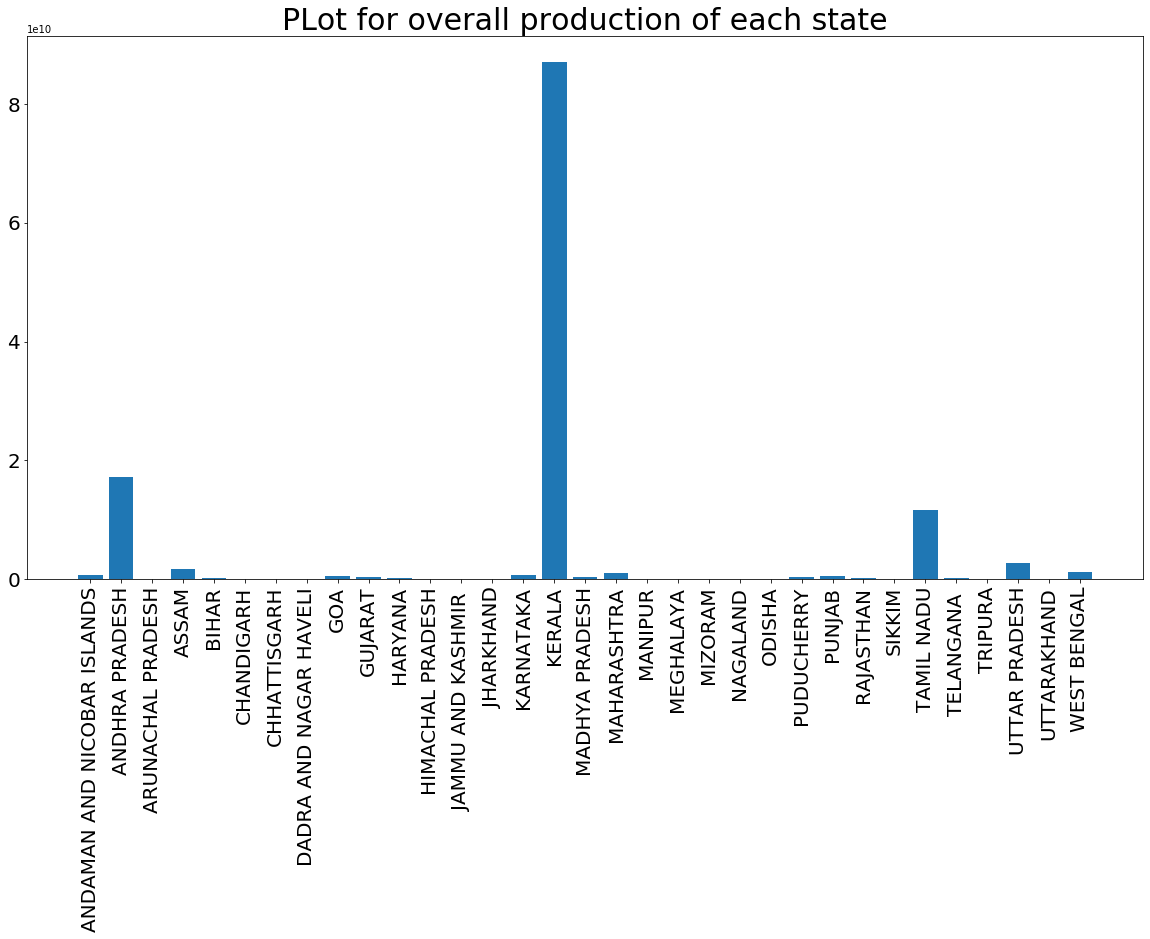

In [26]:
plt.figure(figsize=(20,10))
plt.bar(range(len(state_set)), list(state_set.values()), align='center')
plt.title("PLot for overall production of each state",fontsize=30)
plt.xticks(range(len(state_set)), list(state_set.keys()),fontsize=20,rotation='vertical')
plt.yticks(fontsize=20)
plt.show()

## Function to obtaion plot describing production for each year 

In [27]:
def production(state):
    sum_crop=0
    year_set={}
    area_set={}
    for year in df_crop["Crop_Year"].unique():
        df_year=df_crop[df_crop["Crop_Year"]==year]
        sum_crop=df_year.loc[df_year['State_Name'] == state, 'Production'].sum()
        area_crop=df_year.loc[df_year['State_Name'] == state, 'Area'].sum()
        area_set[year]=area_crop
        year_set[year]=sum_crop
    plt.figure(figsize=(20,10))
    plt.subplot(2, 1, 1)
    plt.plot(range(len(year_set)), list(year_set.values()),linewidth=4)
    plt.title("Crop Production of State From 2001 to 2015",fontsize=30)
    plt.xticks(range(len(year_set)), list(year_set.keys()),fontsize=20)
    plt.yticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.subplot(2, 1, 2)
    plt.plot(range(len(area_set)),list(area_set.values()),linewidth=5,color="r")
    plt.title("Area used for cultivation from 2000-2015",fontsize=20)
    plt.xticks(range(len(area_set)), list(area_set.keys()),fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("YEARS",fontsize=20)
    plt.ylabel("Area in acers",fontsize=20)
    plt.show() 
    return  year_set,area_set

## State name as argument (Input)

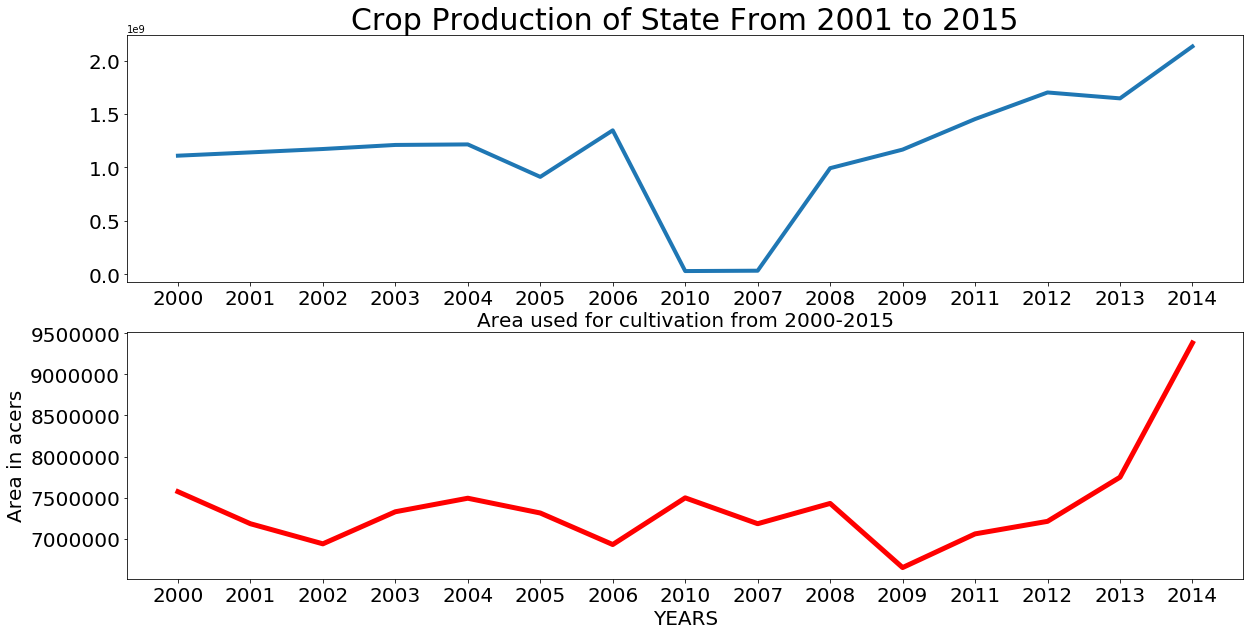

({2000: 1109115170.0,
  2001: 1139992191.0,
  2002: 1171693045.0,
  2003: 1209711817.0,
  2004: 1214755967.0,
  2005: 910784119.0,
  2006: 1346435525.0,
  2010: 28734414.0,
  2007: 32004000.0,
  2008: 992187030.0,
  2009: 1166248787.0,
  2011: 1452094648.0,
  2012: 1701186985.0,
  2013: 1645871862.0,
  2014: 2132267203.0},
 {2000: 7574142.0,
  2001: 7184750.0,
  2002: 6940581.0,
  2003: 7330005.0,
  2004: 7494459.0,
  2005: 7314999.0,
  2006: 6931981.0,
  2010: 7498987.0,
  2007: 7185000.0,
  2008: 7431308.0,
  2009: 6652285.0,
  2011: 7061350.0,
  2012: 7213688.0,
  2013: 7749711.0,
  2014: 9380532.0})

In [28]:
production("ANDHRA PRADESH")

# Here we can compare the production and area used for cultivation for each year 

## Area is factor that effects the production (Area and Production are proportional to each other)

## Observation: Drastic change in 2006 to 2008 even though the area alloted is not decreased

# Function to obtain production of particular crop in every state

In [29]:
def crops(crop):
    data_crop=df_crop[df_crop["Crop"]==crop]
    print("Total number of states involved in",crop,"production are",data_crop["State_Name"].nunique())
    states=list(data_crop["State_Name"].unique())
    production=list(data_crop.groupby(data_crop["State_Name"]).Production.sum())
    print(dict(zip(states,production)))
    plt.figure(figsize=(20,10))
    plt.bar(states,production)
    plt.xlabel("States that are cultivating",fontsize=20)
    plt.ylabel("Amount of production",fontsize=20)
    plt.xticks(fontsize=20,rotation='vertical')
    plt.show()

### applying function to "Rice" producion

Total number of states involved in Rice production are 33
{'ANDAMAN AND NICOBAR ISLANDS': 223006.06000000003, 'ANDHRA PRADESH': 122256014.0, 'ARUNACHAL PRADESH': 2331048.5999999996, 'ASSAM': 62430379.0, 'BIHAR': 81011940.0, 'CHANDIGARH': 3253.0, 'CHHATTISGARH': 81498618.0, 'DADRA AND NAGAR HAVELI': 401380.0, 'GOA': 1372328.0, 'GUJARAT': 16041100.0, 'HARYANA': 41767300.0, 'HIMACHAL PRADESH': 1181988.0, 'JAMMU AND KASHMIR ': 3719577.800000001, 'JHARKHAND': 7527411.940000002, 'KARNATAKA': 55250929.79, 'KERALA': 9095918.580000002, 'MADHYA PRADESH': 24528241.0, 'MAHARASHTRA': 35661082.0, 'MANIPUR': 3103280.0, 'MEGHALAYA': 3060898.0, 'MIZORAM': 828821.0, 'NAGALAND': 4654540.0, 'ODISHA': 102970380.0, 'PUDUCHERRY': 869924.0, 'PUNJAB': 155142000.0, 'RAJASTHAN': 2036442.0, 'SIKKIM': 318053.0, 'TAMIL NADU': 77788277.0, 'TELANGANA ': 59656202.0, 'TRIPURA': 9687901.0, 'UTTAR PRADESH': 183656068.0, 'UTTARAKHAND': 9195479.0, 'WEST BENGAL': 217780127.0}


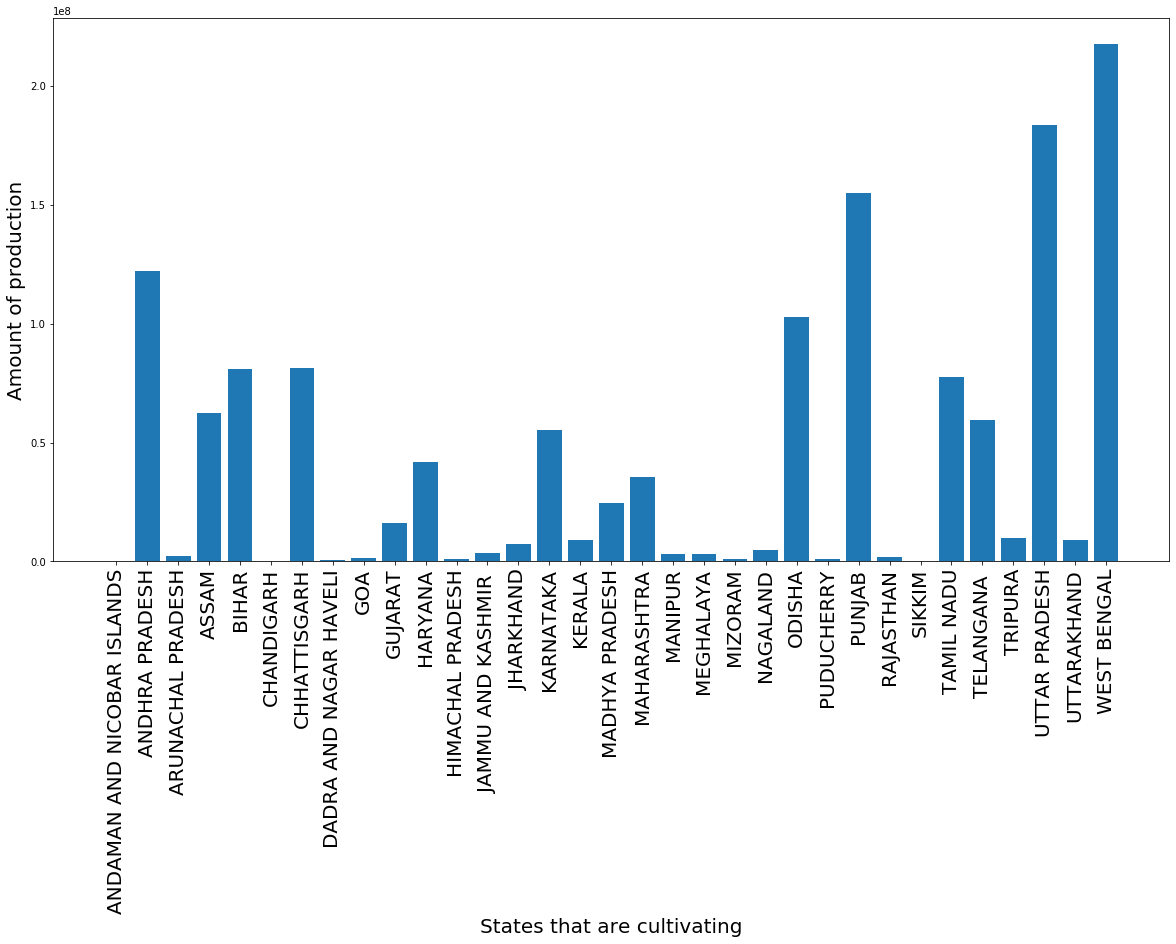

In [30]:
crops('Rice')

# Function to obtation " What is the contribution of every state " in a particular (All the Crops included)

In [31]:
def year_rain(year):
    df_year=df_rain[df_rain["YEAR"]==year]
    plt.figure(figsize=(20,10))
    plt.bar(df_year["SD_Name"],df_year["ANNUAL"])
    plt.xticks(fontsize=20,rotation="vertical")
    plt.yticks(fontsize=20)
    plt.xlabel("States",fontsize=20)
    plt.ylabel("rainfall",fontsize=20)
    plt.show()
    return df_year

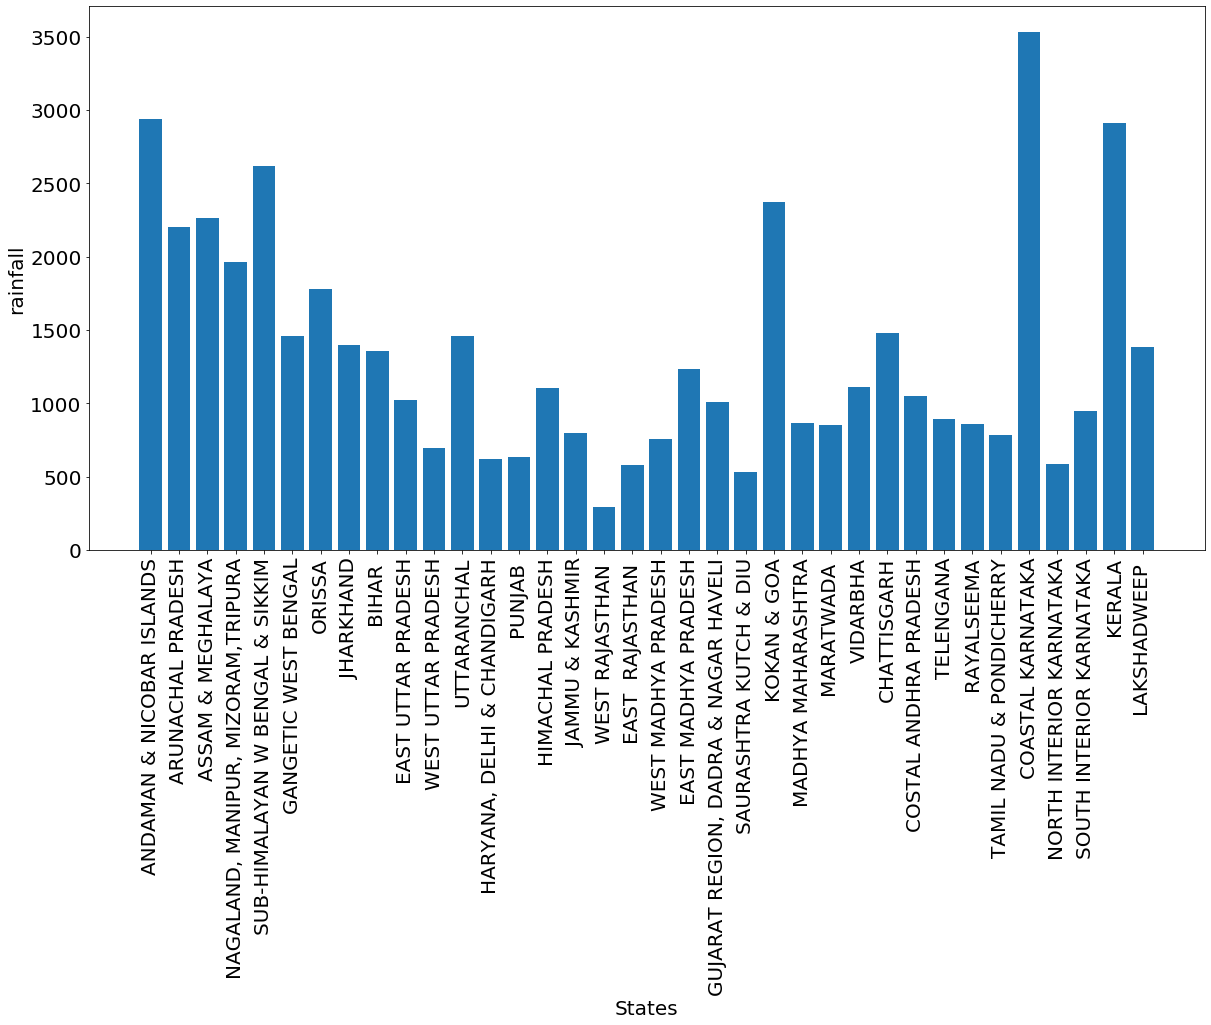

,SD_Name,YEAR,ANNUAL
1797,ANDAMAN & NICOBAR ISLANDS,2001,2935.1
1798,ARUNACHAL PRADESH,2001,2199.9
1799,ASSAM & MEGHALAYA,2001,2260.1
1800,"NAGALAND, MANIPUR, MIZORAM,TRIPURA",2001,1962.9
1801,SUB-HIMALAYAN W BENGAL & SIKKIM,2001,2620.0
1802,GANGETIC WEST BENGAL,2001,1459.9
1803,ORISSA,2001,1777.5
1804,JHARKHAND,2001,1397.8
1805,BIHAR,2001,1353.9
1806,EAST UTTAR PRADESH,2001,1025.6


In [32]:
year_rain(2001)

## Function for raifall in particular state from 2000-2015

In [33]:
def state_rain(state_name):
    df_state=df_rain[df_rain["SD_Name"]==state_name]
    plt.figure(figsize=(20,10))
    plt.plot(df_state["YEAR"],df_state["ANNUAL"],linewidth=5)
    plt.title("Rain fall in the state from 2000-2015",fontsize=30)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20,rotation="vertical")
    plt.xlabel("From 2000-2015",fontsize=20)
    plt.ylabel("Amount of rain fall in millimeters-mm",fontsize=20)
    plt.show()
    return df_state
    

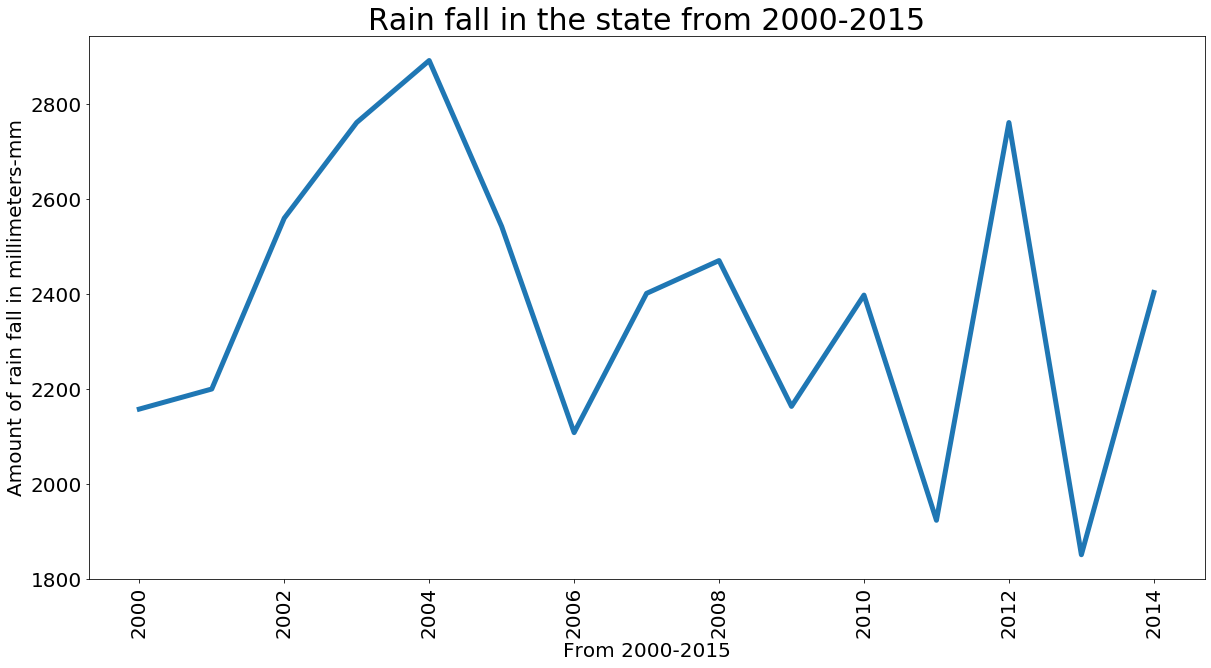

,SD_Name,YEAR,ANNUAL
1762,ARUNACHAL PRADESH,2000,2157.6
1798,ARUNACHAL PRADESH,2001,2199.9
1834,ARUNACHAL PRADESH,2002,2559.6
1870,ARUNACHAL PRADESH,2003,2761.2
1906,ARUNACHAL PRADESH,2004,2891.7
1942,ARUNACHAL PRADESH,2005,2542.4
1978,ARUNACHAL PRADESH,2006,2108.0
2014,ARUNACHAL PRADESH,2007,2401.3
2050,ARUNACHAL PRADESH,2008,2470.4
2086,ARUNACHAL PRADESH,2009,2163.3


In [34]:
state_rain("ARUNACHAL PRADESH")

## Testing Hypothesis

### Applying defined functions for the state "Kerala" to find solution for Hypothesis

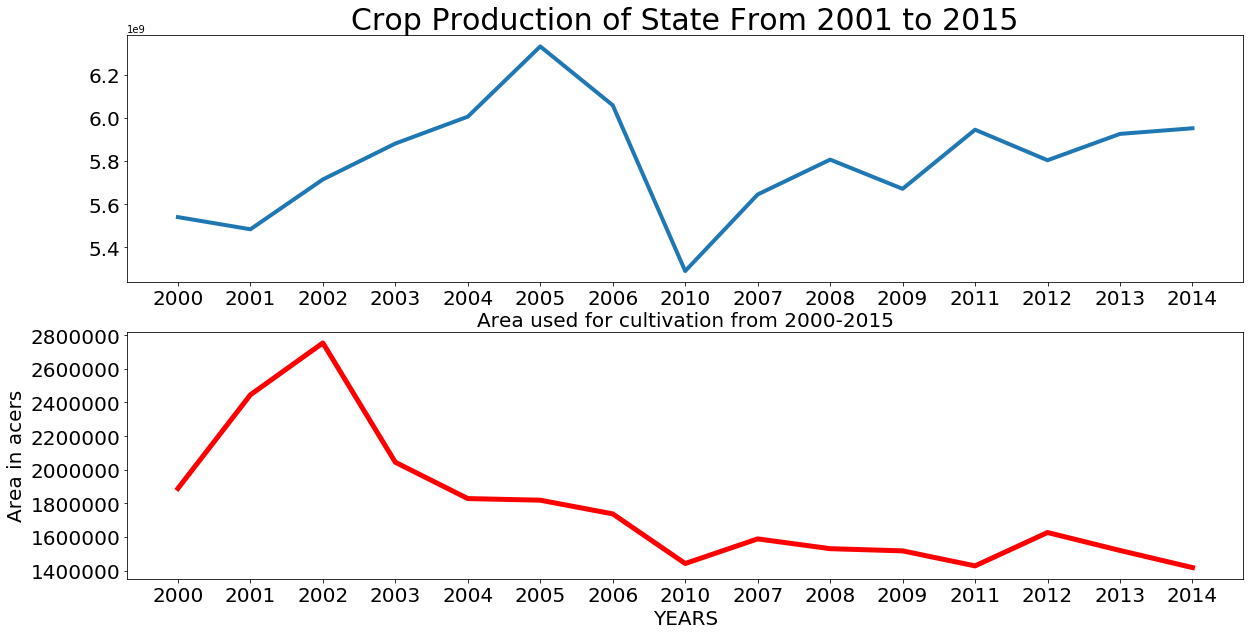

({2000: 5540246958.0,
  2001: 5483808705.0,
  2002: 5714479317.299999,
  2003: 5880748609.0,
  2004: 6005024382.0,
  2005: 6330149083.0,
  2006: 6058002686.0,
  2010: 5290467762.96,
  2007: 5644957287.0,
  2008: 5806276603.0,
  2009: 5671066829.0,
  2011: 5944704112.63,
  2012: 5803398507.0,
  2013: 5925292577.0,
  2014: 5951362646.809999},
 {2000: 1888426.0,
  2001: 2445363.0,
  2002: 2753894.0,
  2003: 2044387.0,
  2004: 1828384.0,
  2005: 1818823.0,
  2006: 1737460.0,
  2010: 1442320.0999999999,
  2007: 1588682.0,
  2008: 1530527.0,
  2009: 1517463.0,
  2011: 1428147.88,
  2012: 1626602.0,
  2013: 1519805.29,
  2014: 1418145.06})

In [35]:
production("KERALA")

### Observation : There is a slight relation between area used for cultivation and production 
# Which implies the decrease or increase pf production od effected by the land that is used for cultivation

### Can Conclude? 
# No
### Rainfall can also be another important factor of state effecting the productions of crops

## Verifying the hypothesis with rain-fall factor by calling "state_rain()" funtion which gives the data of rainfall in "Kerala" from 2000-2015

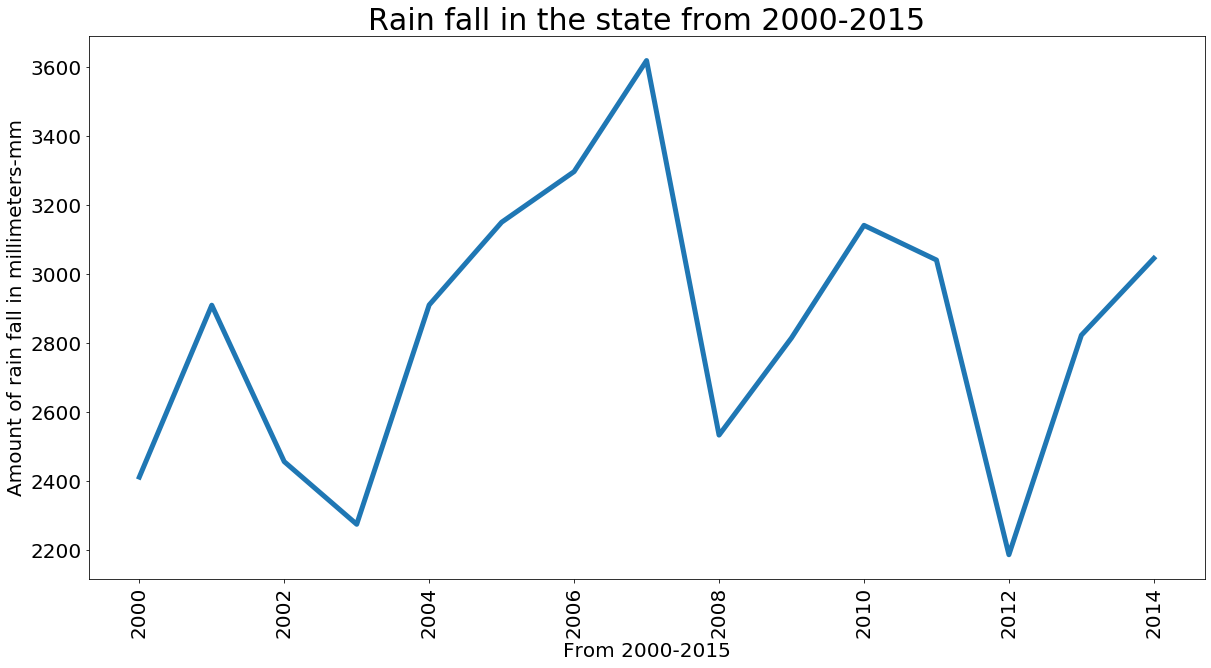

,SD_Name,YEAR,ANNUAL
1795,KERALA,2000,2412.5
1831,KERALA,2001,2910.6
1867,KERALA,2002,2457.3
1903,KERALA,2003,2275.8
1939,KERALA,2004,2911.3
1975,KERALA,2005,3151.0
2011,KERALA,2006,3297.7
2047,KERALA,2007,3619.5
2083,KERALA,2008,2534.2
2119,KERALA,2009,2815.9


In [36]:
state_rain("KERALA")

# OBSERVATION: When plots of both the above functions "production()" and "state_rain()" are compared we can conclude that rainfall has not effected the production
### There is no change in production when change in ranfall is observed
# Conclusion : The fluctuation of production in "KERALA" is due to change in allotment of land for production of crops
### Not all the states will be having area of cultivation land or rainfall as factors effecting production


## List of All the Functions Defined and Used:
### production() - plot comparing total production of a input state to area used for cultivation (Input parameter=State Name) eg:kerala
### crops()-Amount of input crop cultivated in each state from 2000 to 2015 (Input paramter=Crop name) eg:Rice
### year_rain()- Amount of rainfall in each state for particular year (Input parameter=year) eg:2001
### state_rain()-Amount of rainfall in particular state from 2000-2015 (Input parameter=State Name) eg: Kerala